# Regresion lineal en Python

## Regresión lineal simple.
### Paquete statsmodel de regresion lineal

Vamos a usar el dataset de gasto en publicidad vs resultado en ventas que ya vimos. En su momento vimos que el mas correlacionado era el gasto en TV, vamos a demostrarlo. 

En el notebook T4 - 1 1 p-value for linear regression.ipynb vimos que se usaba la función de minimmos cuadrados (least squares) `ols()` de `statsmodels.formula.api` (smf). En el primer parámetro se pasan las variables a contrastar y en el segundo el dataset. Finalmente se llama a fit() para entrenar el modelo lineal.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

from IPython.display import Image # para incluir imagenes local

In [3]:
data_ads = pd.read_csv("../../datasets/ads/advertising.csv")
data_ads.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
lm = smf.ols(formula="Sales~TV", data=data_ads).fit()
# Resultados
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 18 Aug 2020   Prob (F-statistic):           1.47e-42
Time:                        22:38:18   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
# Parametros (son la columna de coef del summary)
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

El modelo lineal predictivo seria:

\begin{equation}
Sales =  7.032594 + 0.0475 * TV
\end{equation}
Para ver si esto es realmente significante, podemos ver el p-valor.
- Aceptamos la hipótesis nula si es mayor de, por ejemplo 0.005
- Rechazamos la hipótesis nula en caso contrario

In [6]:
lm.pvalues


Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

Suficientemente pequeño para rechazar la hipótesis nula con confianza.

Si quisieramos usar la R cuadrado, el paquete nos la ofrece tb tanto en el resumen (R-squared) como preguntando

In [7]:
lm.rsquared

0.611875050850071

### Prediccion con modelo
Vamos a ver que predice nuestro modelo que saldría usando de entrada el gasto real en TV

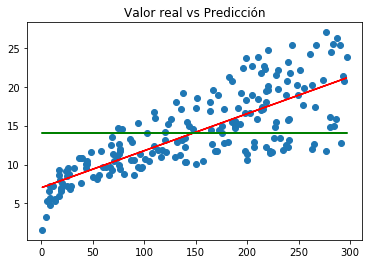

In [22]:
data_ads["lm"] = lm.predict(data_ads["TV"])

media = np.mean(data_ads["Sales"])
data_ads["media"]=[media for i in range(0, len(data_ads))]


plt.plot(data_ads["TV"], data_ads["Sales"], "o")
plt.plot(data_ads["TV"], data_ads["lm"], color='red')
plt.plot(data_ads["TV"], data_ads["media"], "g")
plt.title ("Valor real vs Predicción")
plt.show()



In [9]:
# calculo las desviaciones cuadradas

data_ads["RSE"] = (data_ads["Sales"] - data_ads["lm"])
SSD = sum(data_ads["RSE"]**2)
SSD

2102.5305831313517

In [10]:
RSE = np.sqrt(SSD/(len(data_ads)-2))
RSE

3.258656368650463

In [11]:
#cuanto % no explica el modelo
f"{RSE/media*100}%"

'23.238768897489482%'

(array([ 4., 10., 13., 17., 40., 42., 33., 16., 17.,  8.]),
 array([-8.38598196, -6.82614689, -5.26631183, -3.70647677, -2.14664171,
        -0.58680664,  0.97302842,  2.53286348,  4.09269854,  5.65253361,
         7.21236867]),
 <a list of 10 Patch objects>)

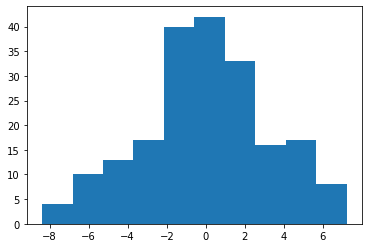

In [12]:
plt.hist(data_ads["RSE"])

los errores se distribuyen aparentemente de acuerdo a una normal de media 0, perfecto, pero queda un 23% sin explicar. Lo ideal seria añadir a la predicción las otras dos columnas, radio y periódicos.

## Regresión lineal múltiple

Con este dataset existen varias posibilidades, de las cuales hemos probado solo la primera. Usaremos la notacion del propio paquete de statsmodel para regresión múltiple
- Sales ~ TV
- Sales ~ Newspaper
- Sales ~ Radio
- Sales ~ TV + Newspaper
- Sales ~ TV + Radio
- Sales ~ Radio + Newspaper
- Sales ~ TV + Newspaper + Radio

La idea seria filtrar primero y simular después:
- Método 1/Destructivo
    - Usar primero todas
    - Quedarse solo con las que tengan los menores p-valores
- Método 2/Constructivo
    - Empezar por una variable a ser posible la de menor RSE
    - Añadir variables que van subiendo Rcuadrado adj

Vamos con el constructivo con la TV



In [13]:
# Añadimos Newspaper al modelo exsistente
lm2 = smf.ols(formula = "Sales ~ TV + Newspaper", data=data_ads).fit()

In [15]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Tue, 18 Aug 2020   Prob (F-statistic):           3.95e-45
Time:                        22:39:03   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.000       4.739       6.811
TV             0.0469      0.003     18.173      0.000       0.042       0.052
Newspaper      0.0442      0.010      4.346      0.000       0.024       0.064
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.415
Skew:                          -0.093   Prob(JB):                        0.813
Kurtosis:                       3.122   Cond. No.                         410.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
lm2.pvalues

Intercept    3.145860e-22
TV           5.507584e-44
Newspaper    2.217084e-05
dtype: float64

El pvalor de Newspaper es bajo, no tanto como TV, pero suficiente. La nueva fórmula seria:
\begin{equation}
Sales =  5.774948 + 0.0469 * TV + 0.0442 * Newspaper
\end{equation}
Comparamos con el R cuadrado como dijimos: debe incrementarlo


In [19]:
lm2.rsquared - lm.rsquared

0.033960442979256156

In [23]:
data_ads["lm2"] = lm2.predict(data_ads[["TV", "Newspaper"]])
data_ads[["TV", "Newspaper", "Sales", "lm", "lm2"]].head()

,TV,Newspaper,Sales,lm,lm2
0,230.1,69.2,22.1,17.970775,19.626901
1,44.5,45.1,10.4,9.147974,9.856348
2,17.2,69.3,9.3,7.850224,9.646055
3,151.5,58.5,18.5,14.234395,15.467318
4,180.8,58.4,12.9,15.627218,16.837102


In [25]:
# calculamos el SSD
data_ads["RSE2"] = data_ads["Sales"] - data_ads["lm2"]
SSD2 = sum(data_ads["RSE2"]**2)
SSD2

1918.5618118968275

In [35]:
RSE2 = np.sqrt(SSD2/(len(data_ads)-3)) # hay una variable mas (-2 -1)

RSE, RSE2
# mejora pero poco

(3.258656368650463, 3.1207198602528856)

### Añadimos radio en vez de periodico

In [29]:
# Añadimos Newspaper al modelo exsistente
lm3 = smf.ols(formula = "Sales ~ TV + Radio", data=data_ads).fit()

In [31]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Tue, 18 Aug 2020   Prob (F-statistic):           4.83e-98
Time:                        22:56:46   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Un R cuadrado de casi el 90% y un Prob (F-statistic):	4.83e-98

Con este ajuste lo petamos

In [33]:
data_ads["lm3"] = lm3.predict(data_ads[["TV", "Radio"]])
data_ads[["TV", "Radio", "Sales", "lm2", "lm3"]].head()

,TV,Radio,Sales,lm2,lm3
0,230.1,37.8,22.1,19.626901,20.555465
1,44.5,39.3,10.4,9.856348,12.345362
2,17.2,45.9,9.3,9.646055,12.337018
3,151.5,41.3,18.5,15.467318,17.617116
4,180.8,10.8,12.9,16.837102,13.223908


In [34]:
# calculamos el SSD
data_ads["RSE3"] = data_ads["Sales"] - data_ads["lm3"]
SSD3 = sum(data_ads["RSE3"]**2)
SSD3

556.9139800676181

In [39]:
RSE3 = np.sqrt(SSD3/(len(data_ads)-4)) # hay una variable mas (-3 -1)

RSE, RSE3
# mejora un huevo

(3.258656368650463, 1.6856446415208182)

In [37]:
#Cuanto % no explica el modelo
f"{RSE3/media*100}%"

'11.990450436855058%'

Añadamos los periódicos

In [38]:
# Añadimos Newspaper al modelo exsistente
lm4 = smf.ols(formula = "Sales ~ TV + Radio + Newspaper", data=data_ads).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 18 Aug 2020   Prob (F-statistic):           1.58e-96
Time:                        23:04:11   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- R-squared:	0.897 Apenas cambia
- Prob (F-statistic):	1.58e-96 Empeora
- Newspaper	-0.0010	0.006	-0.177	0.860	-0.013	0.011  
    - Intervalo de confianza centrado en 0. 
    - P valor casi 1, tan alto que podemos aceptar la hipótesis nula 
    - coeficiente negativo (invertir en periodico estropea? no es util al modelo)

Es menos eficaz al tener una variable mas y predice peor. ¿Por que pasa esto?

### Multicodinealidad